# Gerador de senóide por LSTM

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

## Modelo

In [2]:
class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.lstm1 = nn.LSTMCell(input_size=1,  hidden_size=50)
        self.lstm2 = nn.LSTMCell(input_size=50, hidden_size=50)
        self.linear = nn.Linear(in_features=50, out_features=1)

    def forward(self, input, future = 0):
        outputs = []
        h_t  = Variable(torch.zeros(input.size(0), 50), requires_grad=False)
        c_t  = Variable(torch.zeros(input.size(0), 50), requires_grad=False)
        h_t2 = Variable(torch.zeros(input.size(0), 50), requires_grad=False)
        c_t2 = Variable(torch.zeros(input.size(0), 50), requires_grad=False)

        for input_t in input.chunk(input.size(1), dim=1):
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        for i in range(future):# if we should predict the future
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        outputs = torch.stack(outputs, dim=1).squeeze(dim=2)
        return outputs

## Data set - 100 amostras de comprimento 1000

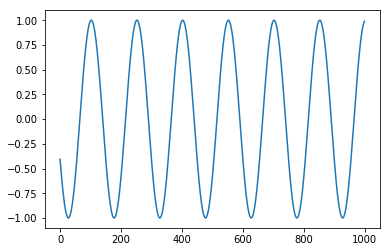

In [3]:
np.random.seed(0)
torch.manual_seed(0)

# Gerando 100 amostras de comprimento 1000, 
T = 150   # periodo
L = 1000  # comprimento da sequência
N = 100   # n. de amostras

x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(2*np.pi*x / T).astype('float32')
plt.plot(data[2])

## Treinamento: 97 amostras, Teste: 3 amostras

In [4]:
input  = Variable(torch.from_numpy(data[3:,  :-1]), requires_grad=False)
target = Variable(torch.from_numpy(data[3:, 1:  ]), requires_grad=False)
test_input  = Variable(torch.from_numpy(data[:3,  :-1]), requires_grad=False)
test_target = Variable(torch.from_numpy(data[:3, 1:  ]), requires_grad=False)

## Preparando para treinar: instanciar o modelo, perda e otimizador

In [5]:
seq = Sequence()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.LBFGS(seq.parameters(), lr=0.8, max_iter=20)

## Treinamento e predição de mais 1000 pontos seguintes

STEP:  0
loss: 0.503344
loss: 0.500307
loss: 0.245677
loss: 0.0212562
loss: 0.020671
loss: 0.0197045
loss: 0.0193709
loss: 0.0185729
loss: 0.0168851
loss: 0.0139745
loss: 0.00979397
loss: 0.00272666
loss: 0.00204944
loss: 0.0012821
loss: 0.00119675
loss: 0.00107439
loss: 0.00104038
loss: 0.000944757
loss: 0.000845956
loss: 0.000818121
test loss: 0.000537634


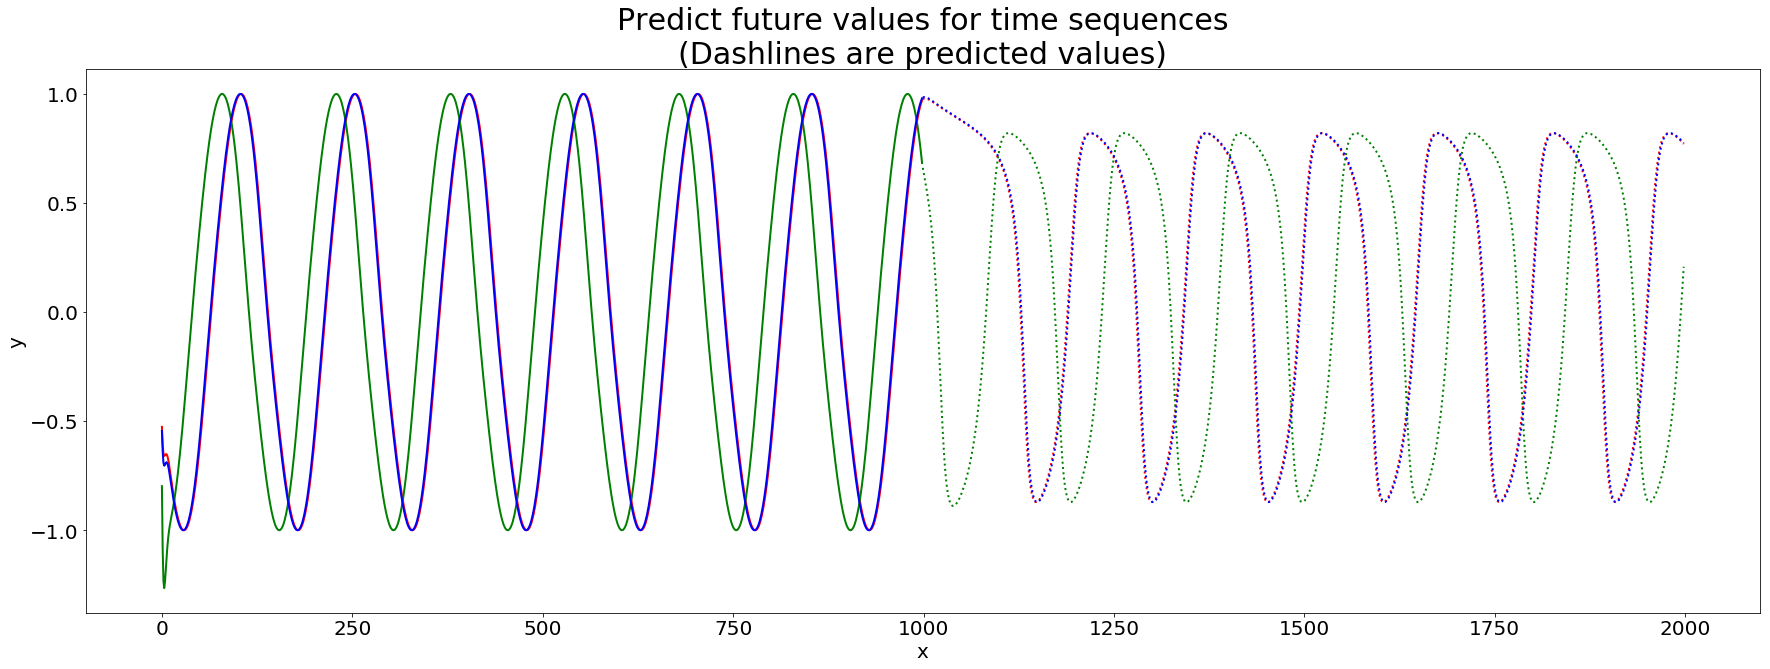

STEP:  1
loss: 0.000798825
loss: 0.000778367
loss: 0.000735845
loss: 0.000634632
loss: 0.000538005
loss: 0.000433624
loss: 0.000369236
loss: 0.000329618
loss: 0.000306989
loss: 0.000301043
loss: 0.000287428
loss: 0.000286039
loss: 0.000285424
loss: 0.000284639
loss: 0.000280447
loss: 0.000257197
loss: 0.000244405
loss: 0.000226335
loss: 0.000199739
loss: 0.000191967
test loss: 0.000107915


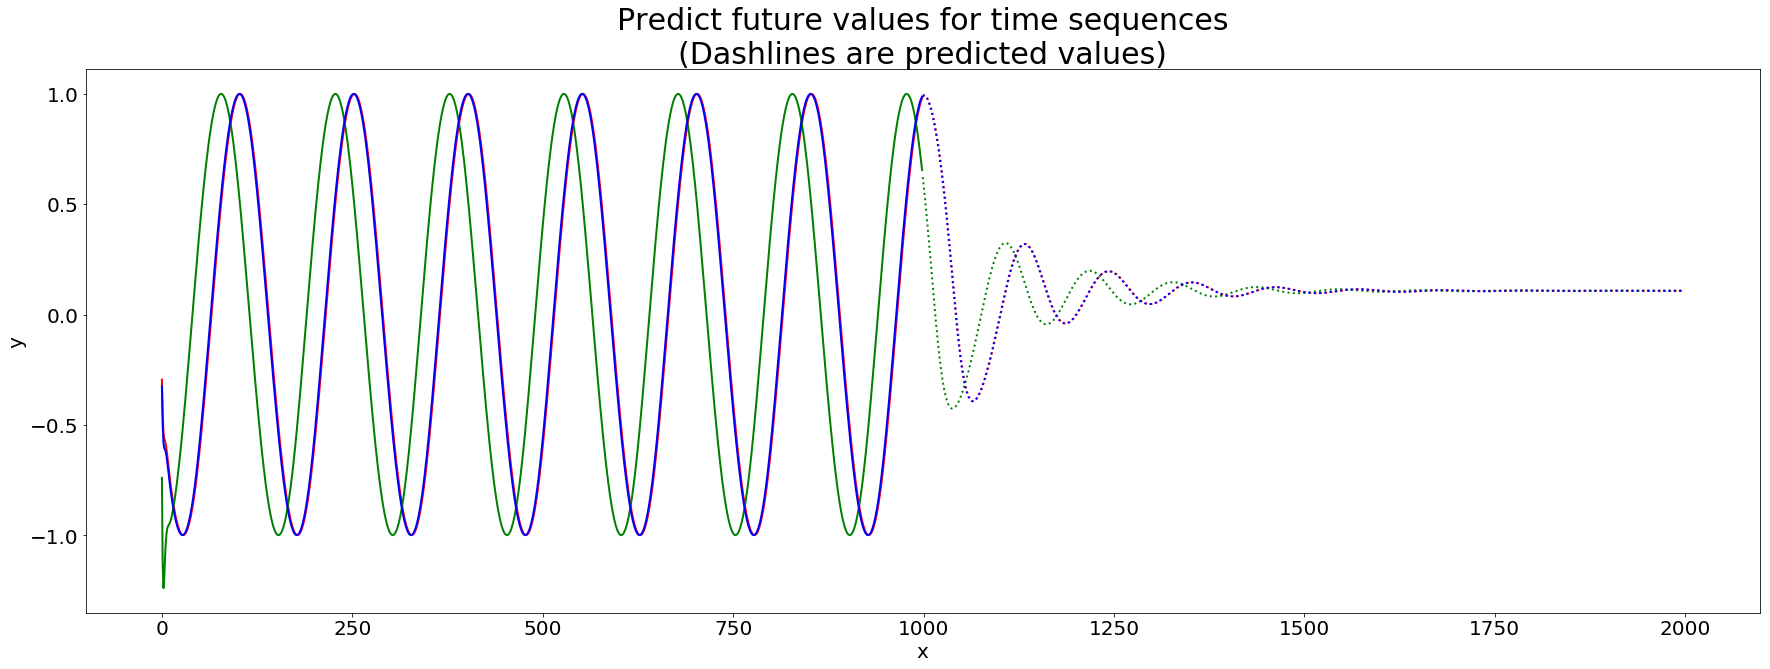

STEP:  2
loss: 0.00018653
loss: 0.000181799
loss: 0.000178359
loss: 0.000175858
loss: 0.000174698
loss: 0.000174209
loss: 0.000173937
loss: 0.000173191
loss: 0.000171531
loss: 0.000167618
loss: 0.000159553
loss: 0.00014884
loss: 0.000148374
loss: 0.000133117
loss: 0.000126428
loss: 0.000117035
loss: 0.000123119
loss: 0.000105244
loss: 0.000104027
loss: 0.000102853
test loss: 0.000108701


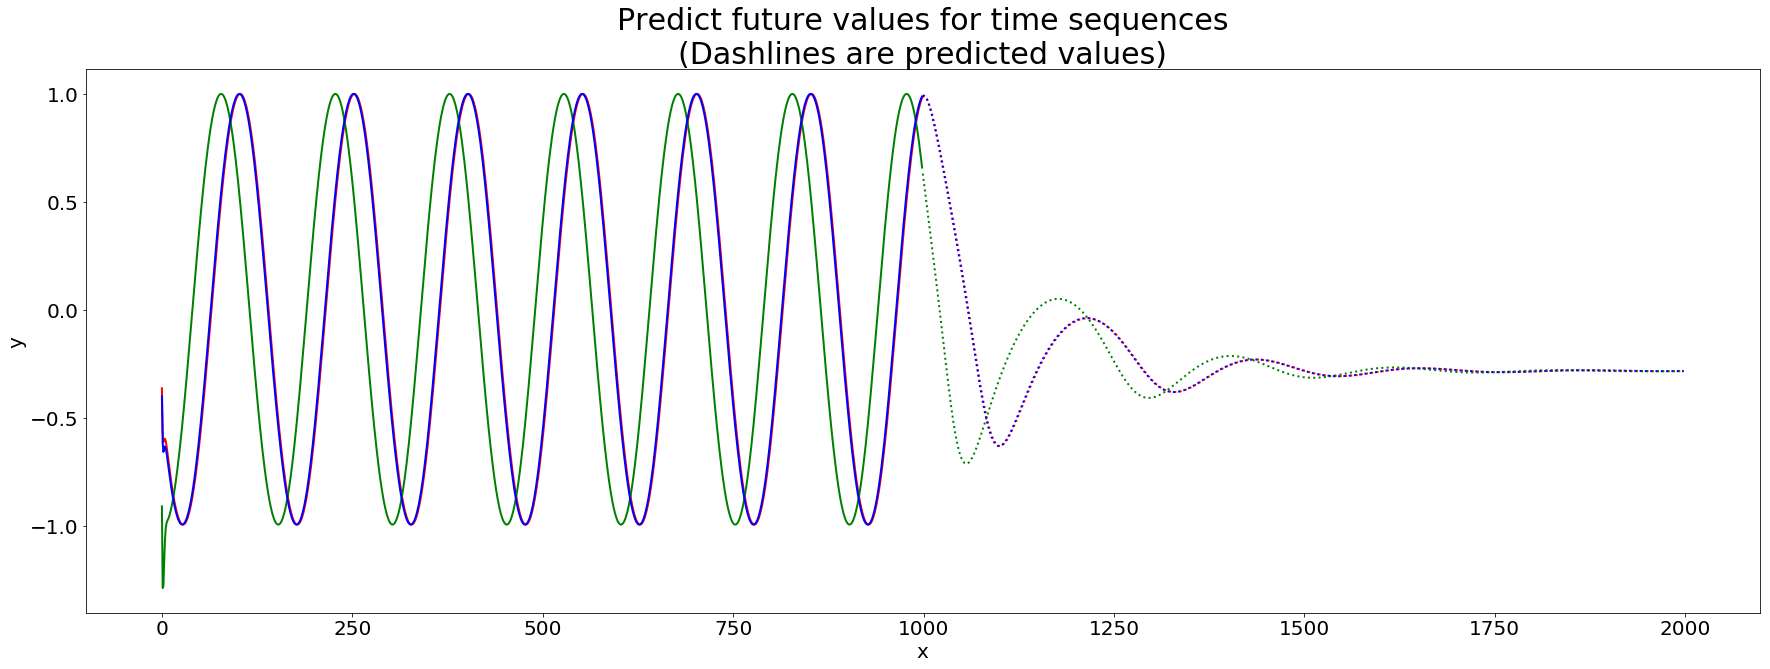

STEP:  3
loss: 0.000102052
loss: 0.000101194
loss: 9.90921e-05
loss: 9.52752e-05
loss: 9.04382e-05
loss: 8.53352e-05
loss: 8.37163e-05
loss: 8.2657e-05
loss: 8.19836e-05
loss: 8.16767e-05
loss: 8.1412e-05
loss: 7.92593e-05
loss: 7.8736e-05
loss: 7.80451e-05
loss: 7.77532e-05
loss: 7.74012e-05
loss: 7.68617e-05
loss: 7.62527e-05
loss: 7.49607e-05
loss: 7.22643e-05
test loss: 5.09599e-05


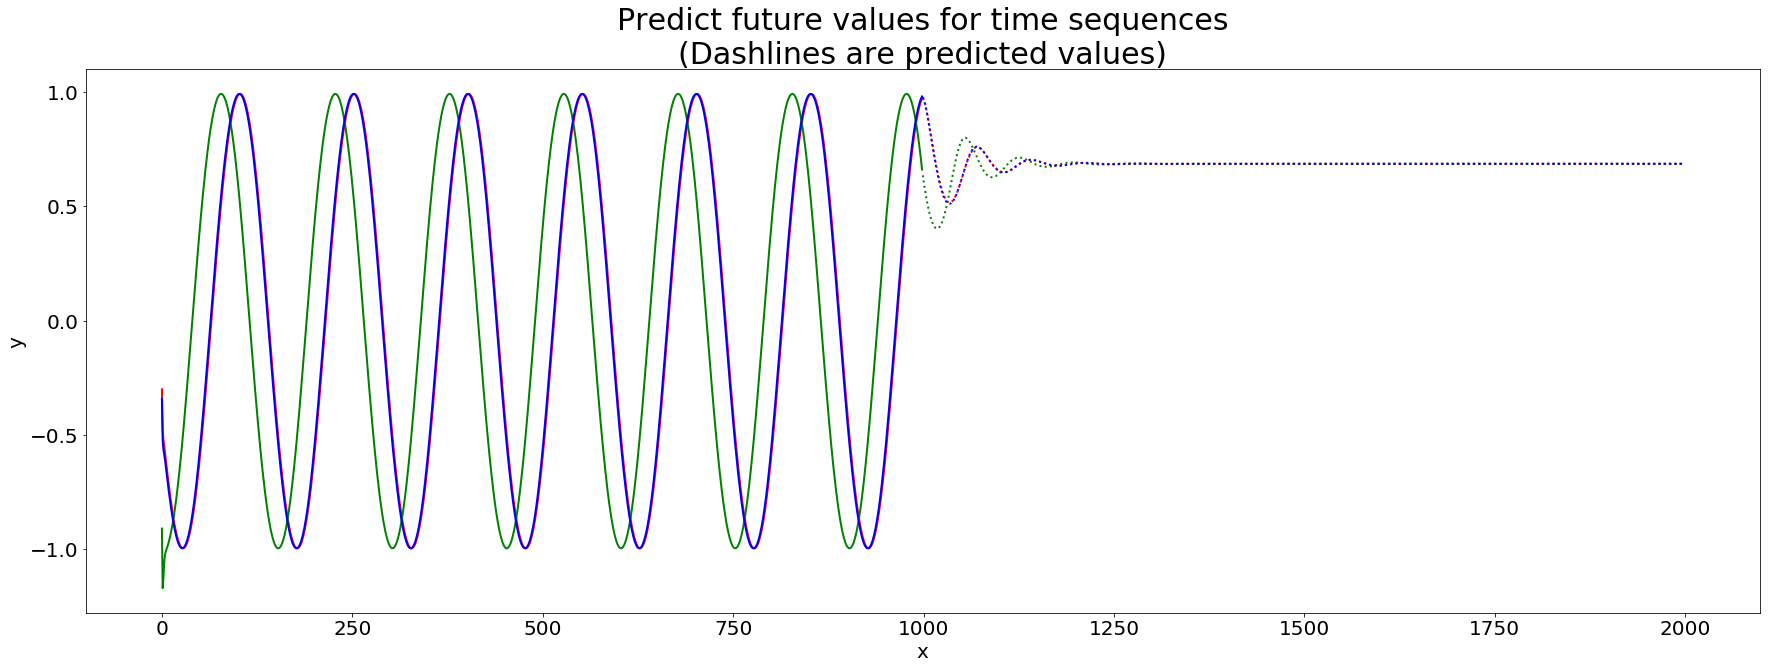

STEP:  4
loss: 6.69754e-05
loss: 6.03111e-05
loss: 9.77961e-05
loss: 4.89499e-05
loss: 4.21663e-05
loss: 3.78082e-05
loss: 3.33517e-05
loss: 3.14407e-05
loss: 3.10915e-05
loss: 3.05369e-05
loss: 3.03475e-05
loss: 3.02407e-05
loss: 3.00929e-05
loss: 2.95205e-05
loss: 2.87091e-05
loss: 2.7919e-05
loss: 2.71515e-05
loss: 2.6562e-05
loss: 2.60327e-05
loss: 2.55774e-05
test loss: 2.13589e-05


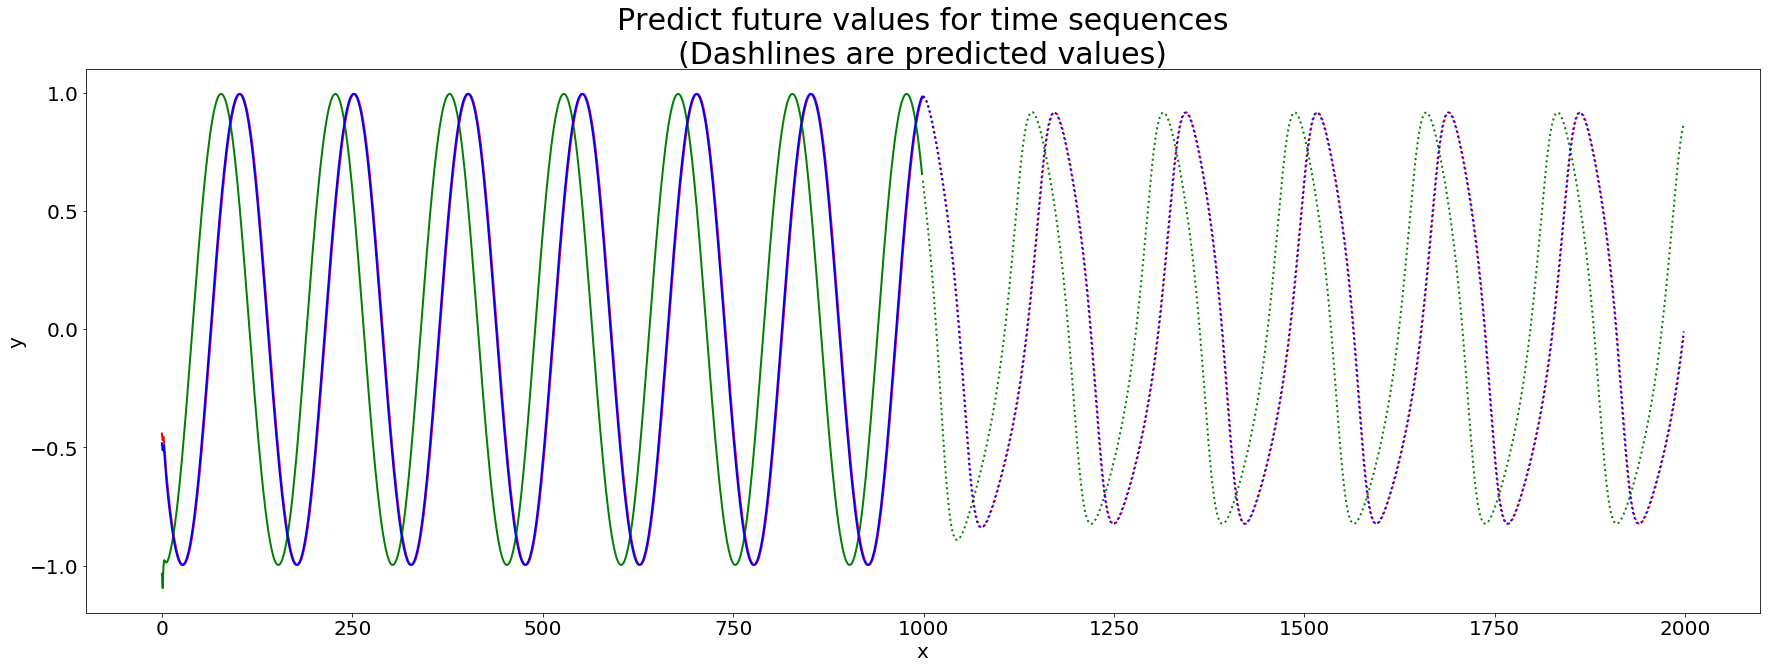

STEP:  5
loss: 2.5379e-05
loss: 2.5267e-05
loss: 2.50323e-05
loss: 2.45567e-05
loss: 2.36881e-05
loss: 2.2348e-05
loss: 2.03191e-05
loss: 1.83105e-05
loss: 1.83365e-05
loss: 1.76804e-05
loss: 1.75552e-05
loss: 1.74895e-05
loss: 1.74384e-05
loss: 1.73864e-05
loss: 1.72184e-05
loss: 1.69852e-05
loss: 1.65384e-05
loss: 1.56915e-05
loss: 1.43733e-05
loss: 1.30231e-05
test loss: 1.3799e-05


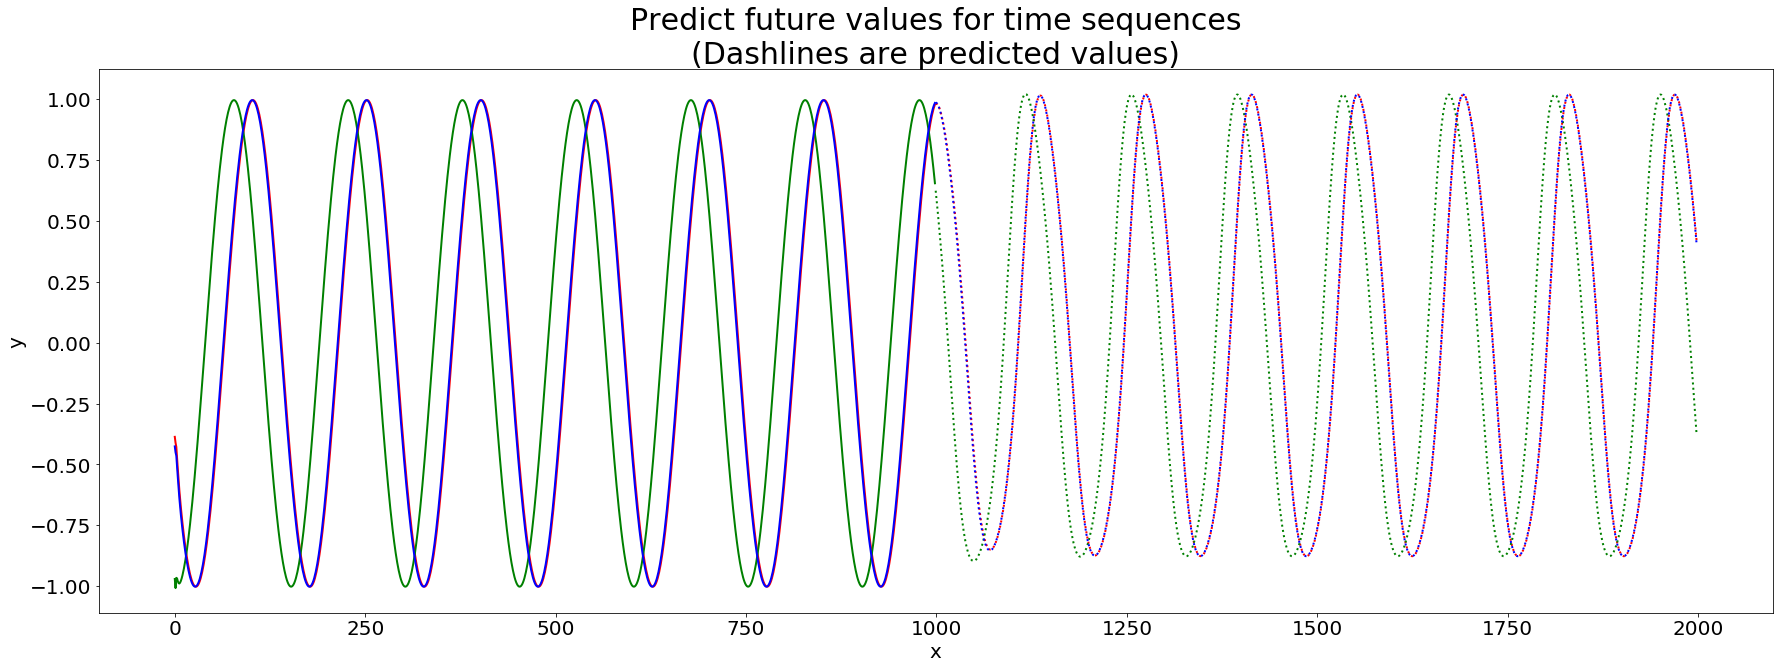

STEP:  6
loss: 1.22877e-05
loss: 1.04246e-05
loss: 9.77043e-06
loss: 8.4658e-06
loss: 7.57354e-06
loss: 7.26691e-06
loss: 7.12857e-06
loss: 7.07468e-06
loss: 7.05572e-06
loss: 7.04834e-06
loss: 7.04304e-06
loss: 7.03881e-06
loss: 7.0359e-06
loss: 7.03452e-06
loss: 7.03123e-06
loss: 7.01797e-06
loss: 6.95543e-06
loss: 6.85018e-06
loss: 6.67246e-06
loss: 6.42826e-06
test loss: 5.30681e-06


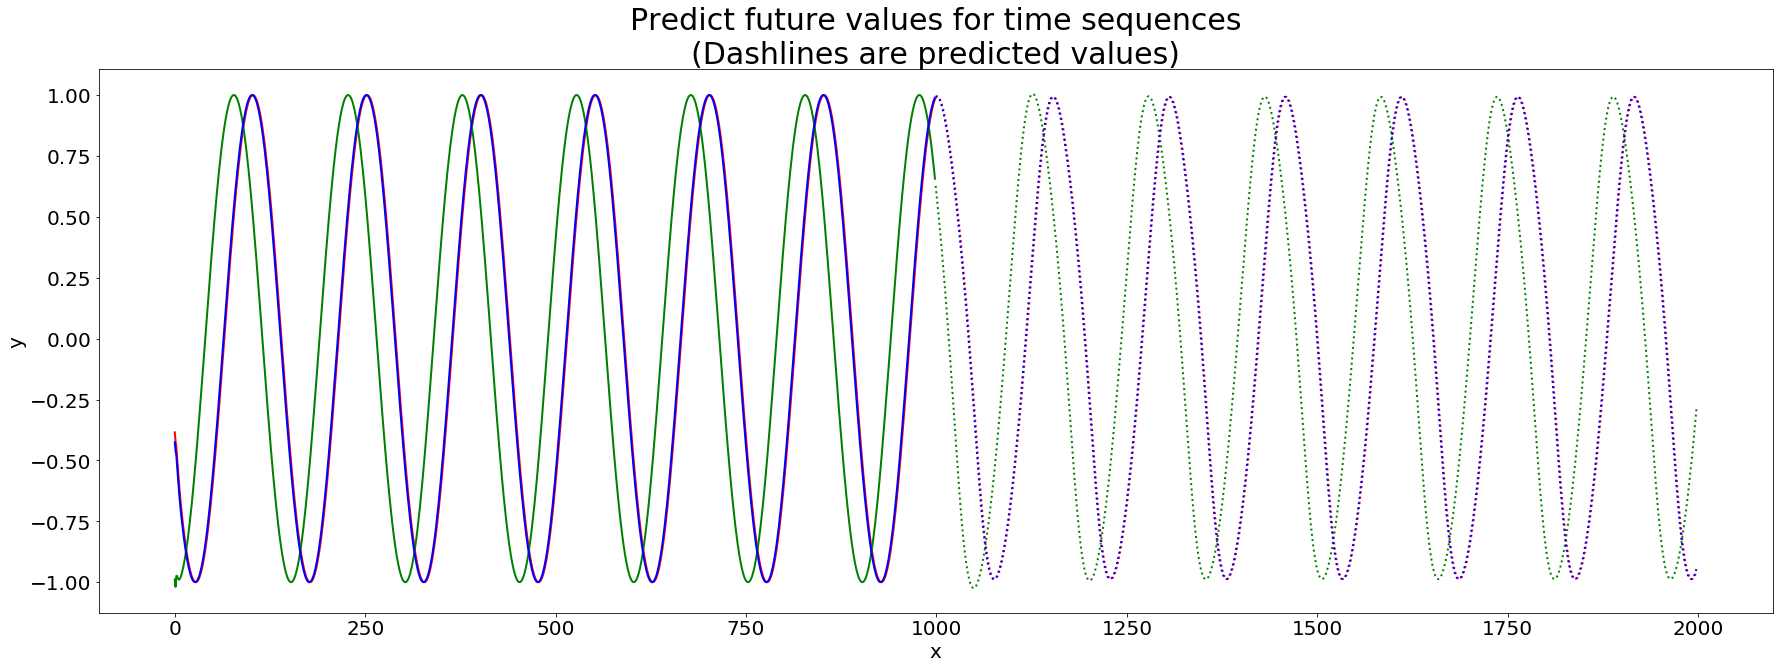

STEP:  7
loss: 6.2062e-06
loss: 6.15314e-06
loss: 6.14106e-06
loss: 6.12611e-06
loss: 6.12356e-06
loss: 6.12094e-06
loss: 6.11423e-06
loss: 6.10247e-06
loss: 6.07487e-06
loss: 6.01736e-06
loss: 5.91708e-06
loss: 5.77995e-06
loss: 5.68039e-06
loss: 5.73175e-06
loss: 5.5936e-06
loss: 5.57681e-06
loss: 5.53453e-06
loss: 5.50445e-06
loss: 5.48874e-06
loss: 5.48177e-06
test loss: 4.38302e-06


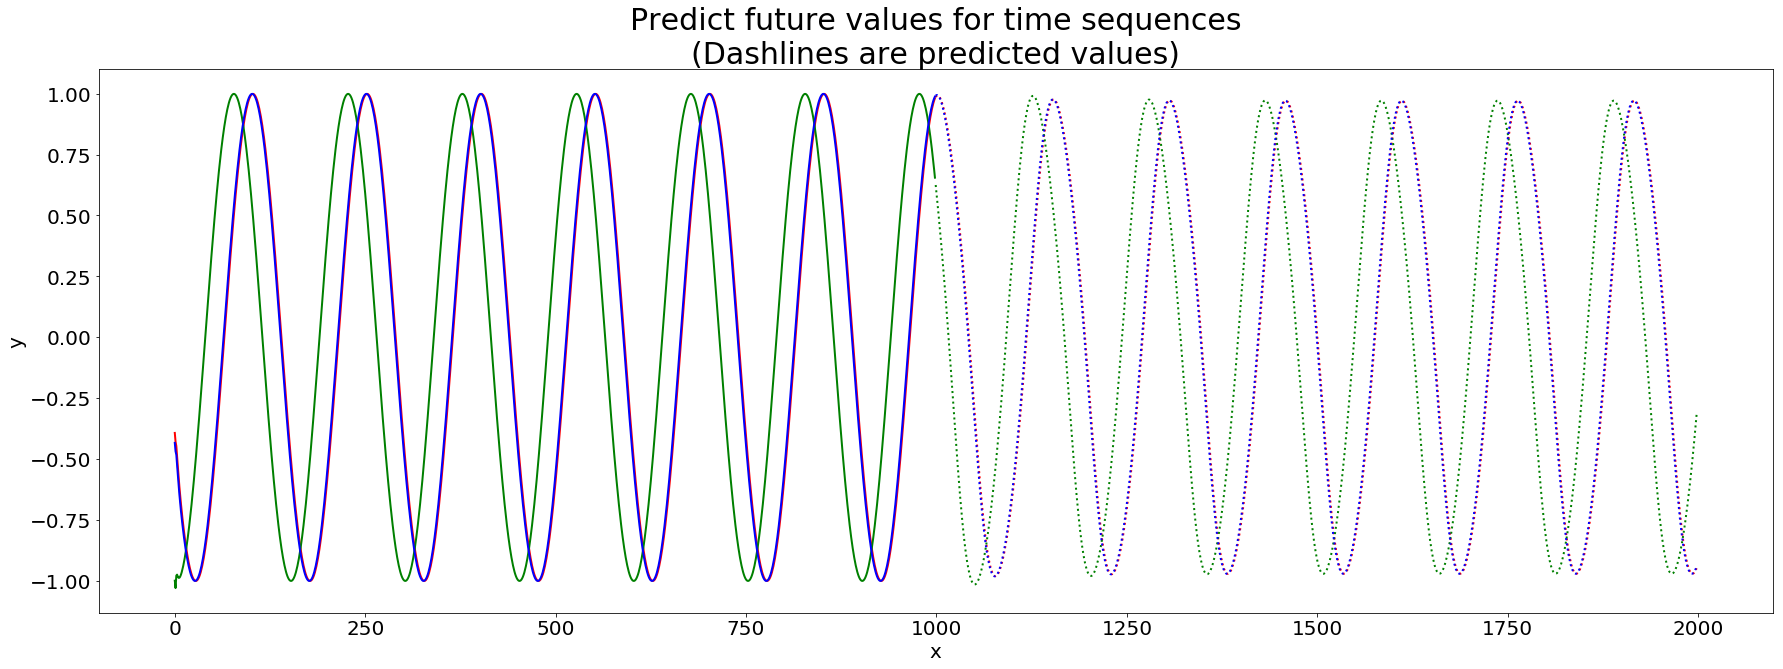

STEP:  8
loss: 5.47511e-06
loss: 5.46433e-06
loss: 5.44252e-06
loss: 5.43268e-06
loss: 5.40441e-06
loss: 5.39759e-06
loss: 5.38991e-06
loss: 5.38041e-06
loss: 5.36403e-06
loss: 5.35142e-06
loss: 5.33189e-06
loss: 5.31245e-06
loss: 5.2538e-06
loss: 5.2041e-06
loss: 9.35209e-06
loss: 5.12269e-06
loss: 5.08018e-06
loss: 5.00465e-06
loss: 4.91615e-06
loss: 4.78276e-06
test loss: 3.46737e-06


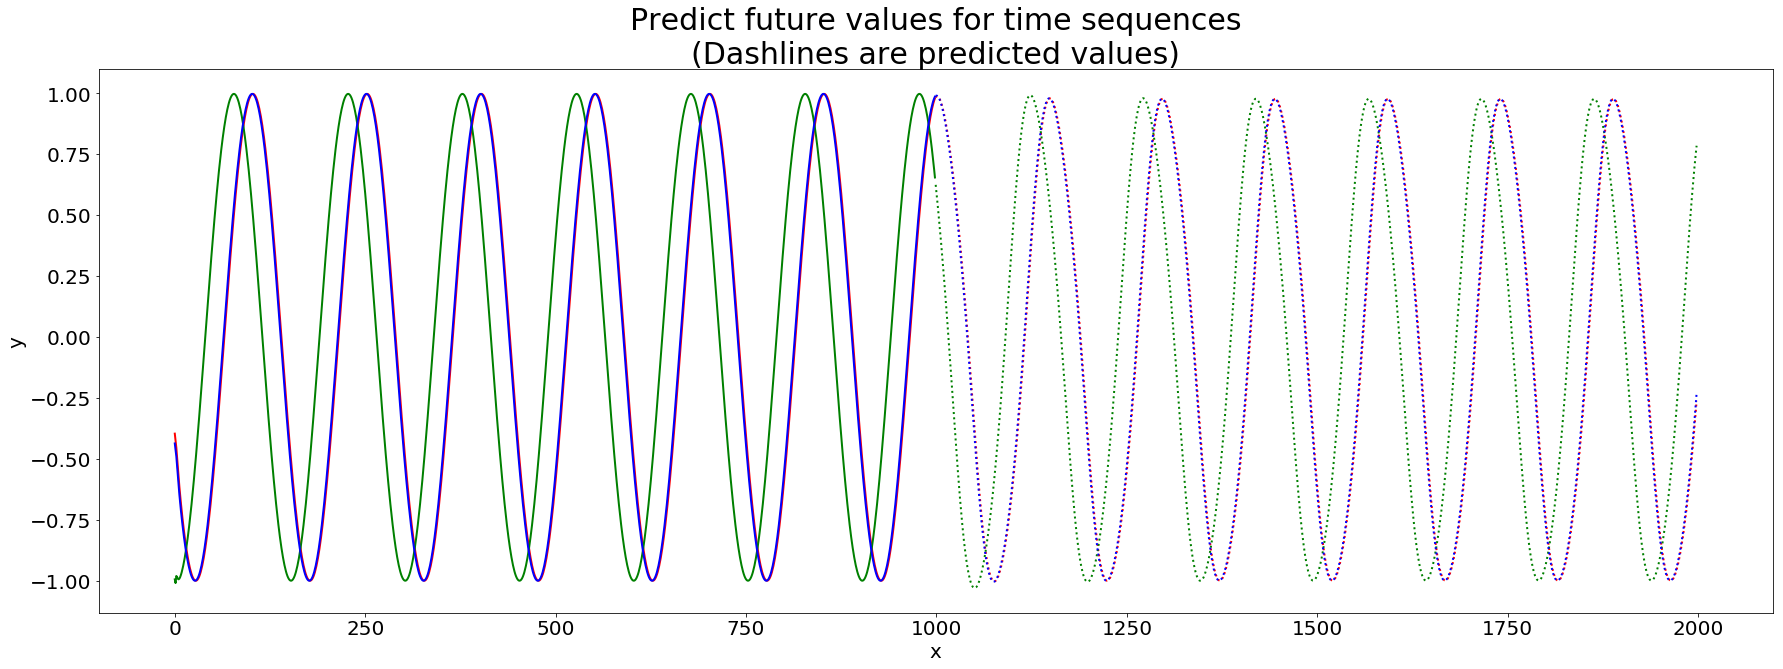

STEP:  9
loss: 4.76762e-06
loss: 4.63509e-06
loss: 4.53692e-06
loss: 4.42814e-06
loss: 4.3987e-06
loss: 4.31738e-06
loss: 4.2681e-06
loss: 4.2966e-06
loss: 4.23926e-06
loss: 4.23438e-06
loss: 4.23064e-06
loss: 4.22736e-06
loss: 4.21692e-06
loss: 4.22225e-06
loss: 4.18443e-06
loss: 4.14293e-06
loss: 4.05276e-06
loss: 3.98306e-06
loss: 3.94941e-06
loss: 3.90869e-06
test loss: 1.7651e-06


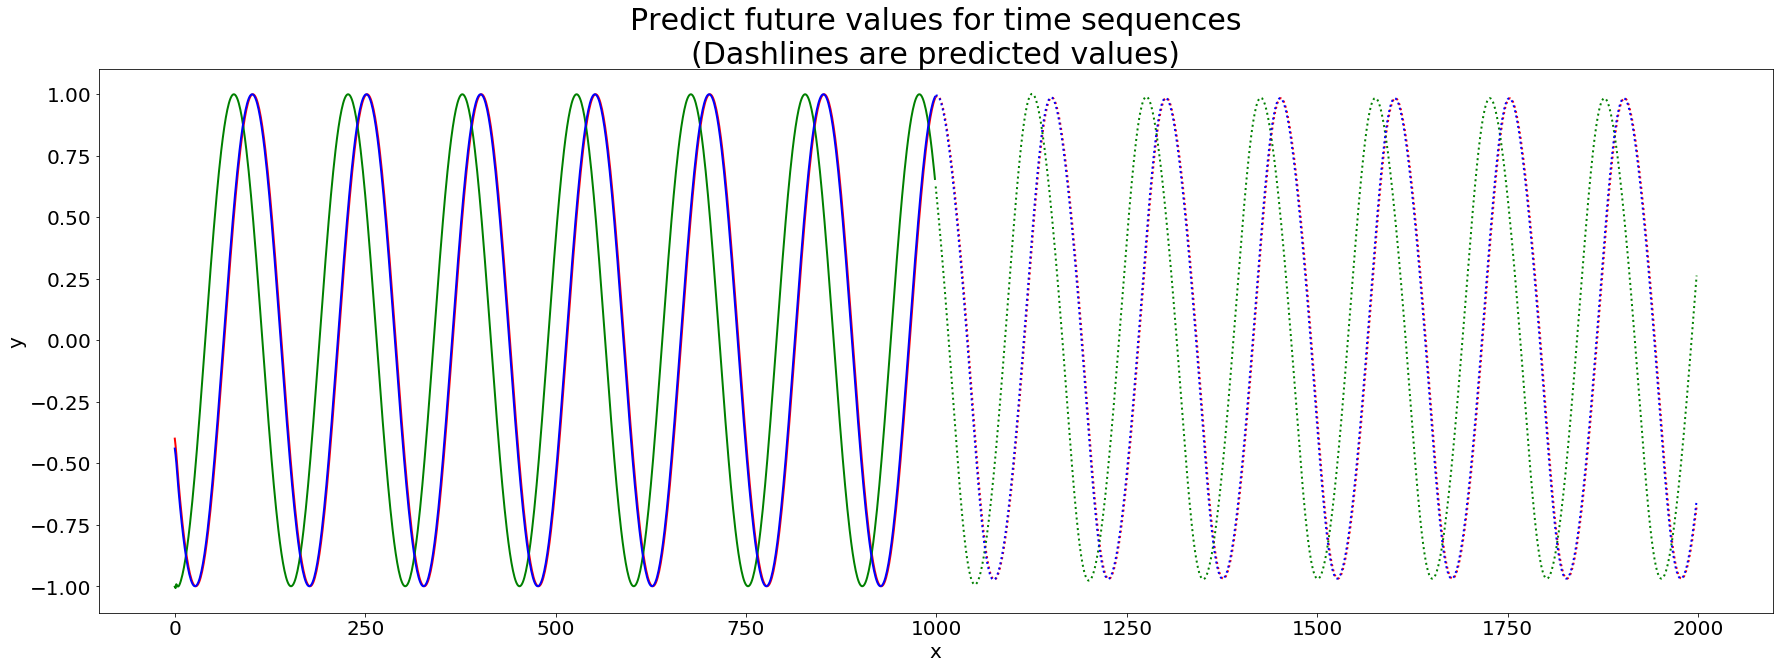

STEP:  10
loss: 3.88943e-06
loss: 3.876e-06
loss: 3.84116e-06
loss: 3.79439e-06
loss: 3.68245e-06
loss: 3.62233e-06
loss: 3.64953e-06
loss: 3.61883e-06
loss: 3.53738e-06
loss: 3.52102e-06
loss: 3.49977e-06
loss: 3.48588e-06
loss: 3.46297e-06
loss: 3.45273e-06
loss: 3.44269e-06
loss: 3.43501e-06
loss: 3.40765e-06
loss: 3.38691e-06
loss: 3.36548e-06
loss: 3.34615e-06
test loss: 1.97312e-06


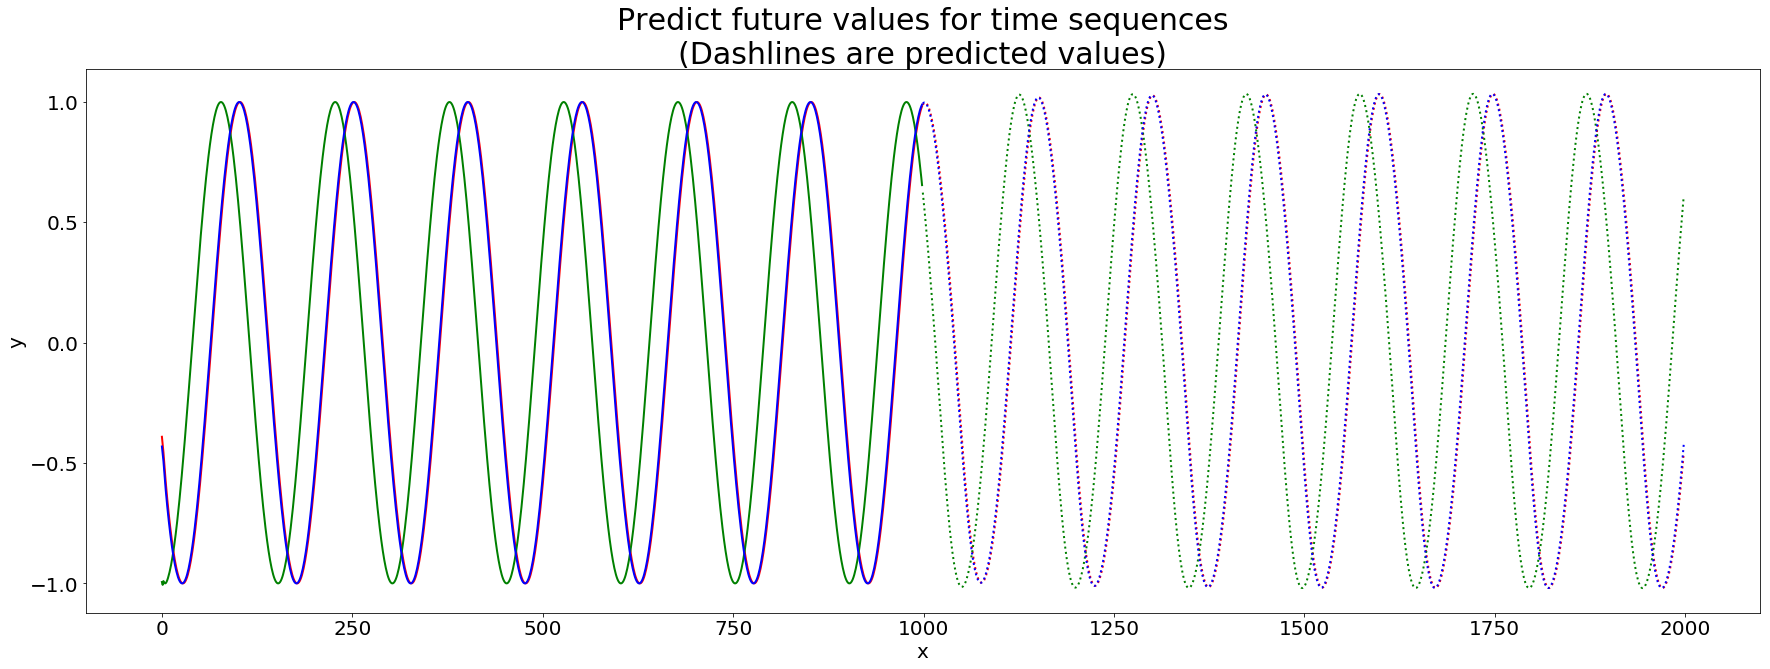

STEP:  11
loss: 3.3235e-06
loss: 3.29164e-06
loss: 3.27035e-06
loss: 3.23807e-06
loss: 3.20088e-06
loss: 3.15716e-06
loss: 3.12856e-06
loss: 3.10326e-06
loss: 3.08247e-06
loss: 3.06692e-06
loss: 3.05616e-06
loss: 3.04837e-06
loss: 3.0428e-06
loss: 3.04193e-06
test loss: 1.74375e-06


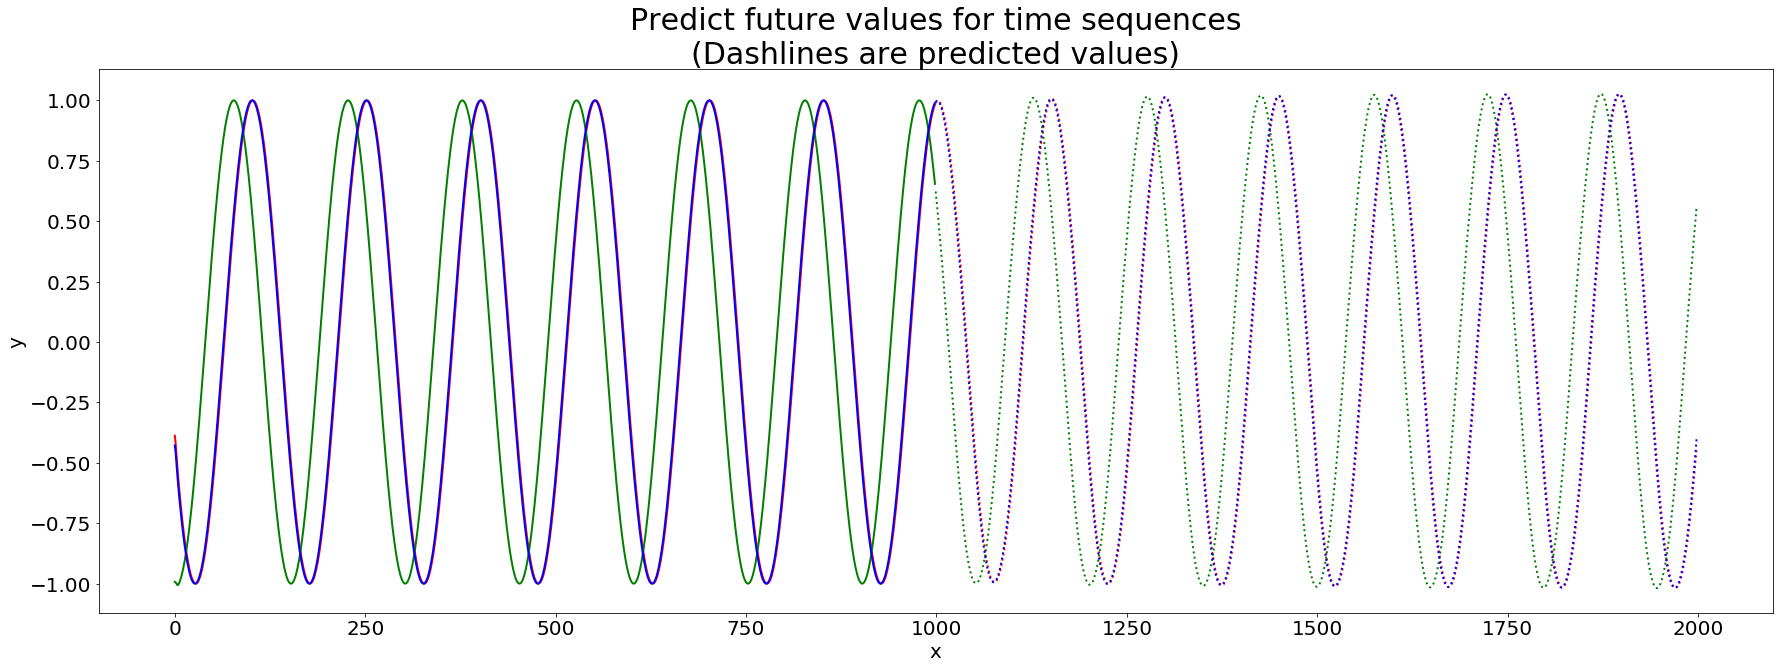

STEP:  12
loss: 3.04193e-06
loss: 3.04127e-06
test loss: 1.7264e-06


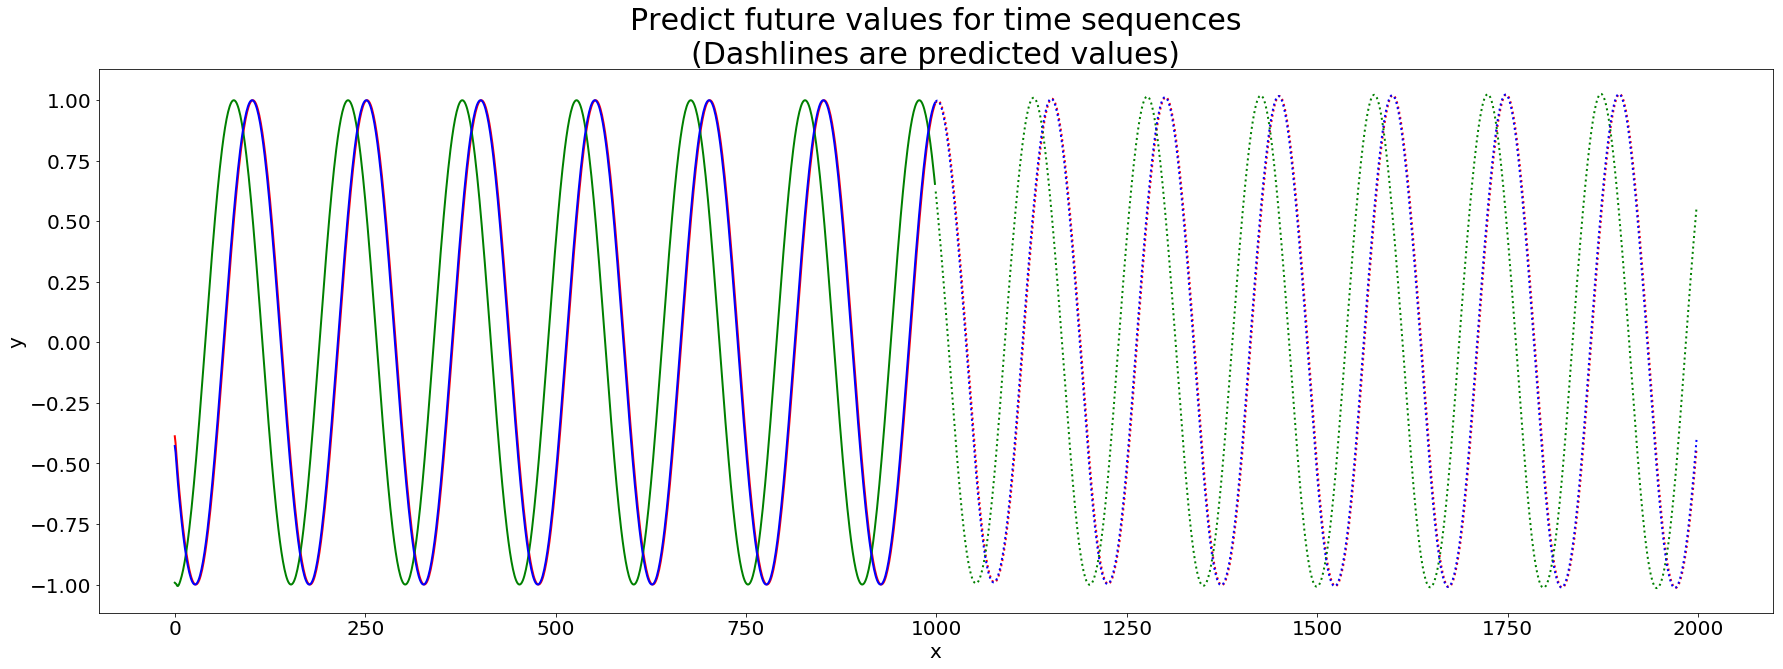

STEP:  13
loss: 3.04127e-06
loss: 3.04078e-06
test loss: 1.71351e-06


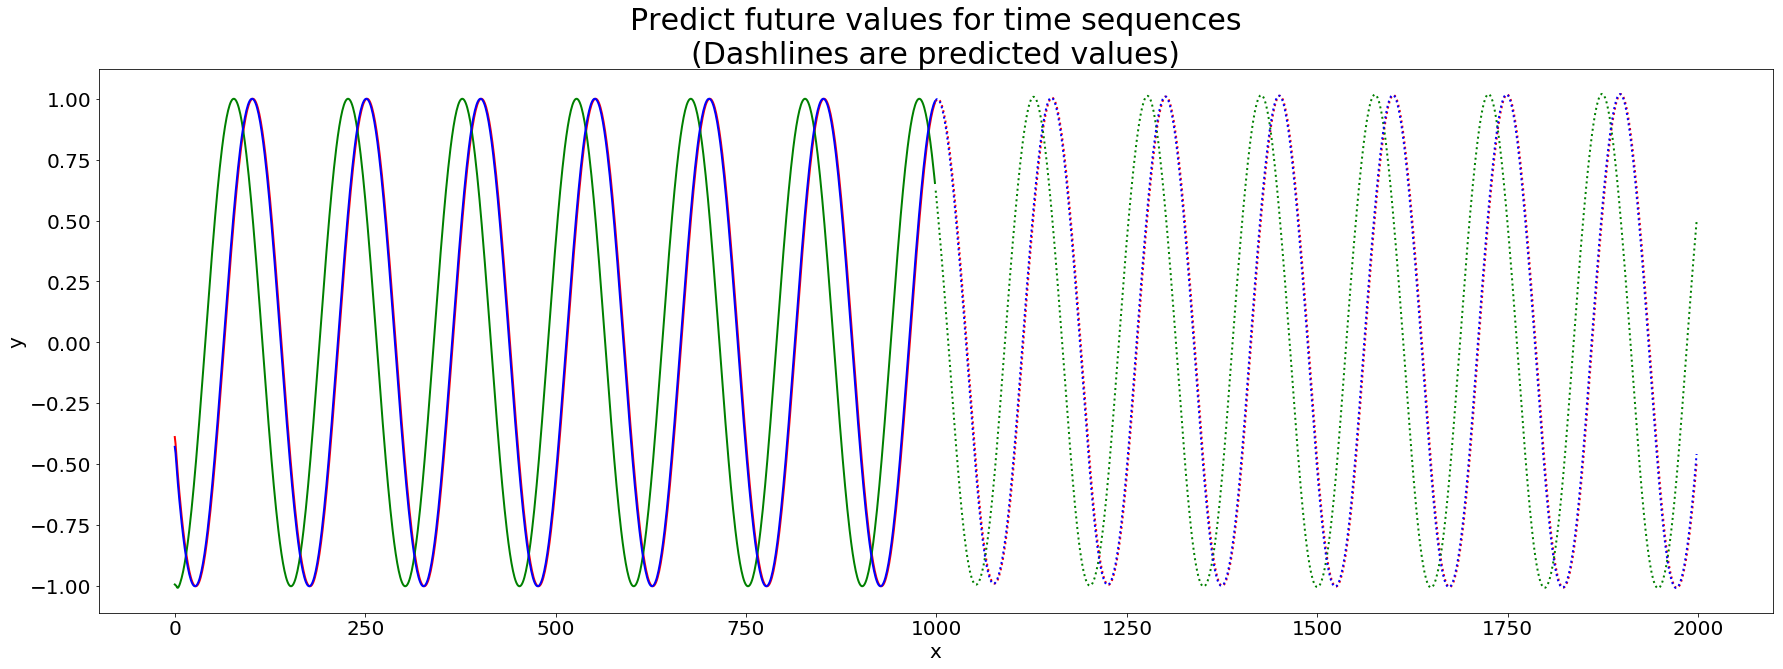

STEP:  14
loss: 3.04078e-06
loss: 3.04104e-06
test loss: 1.70939e-06


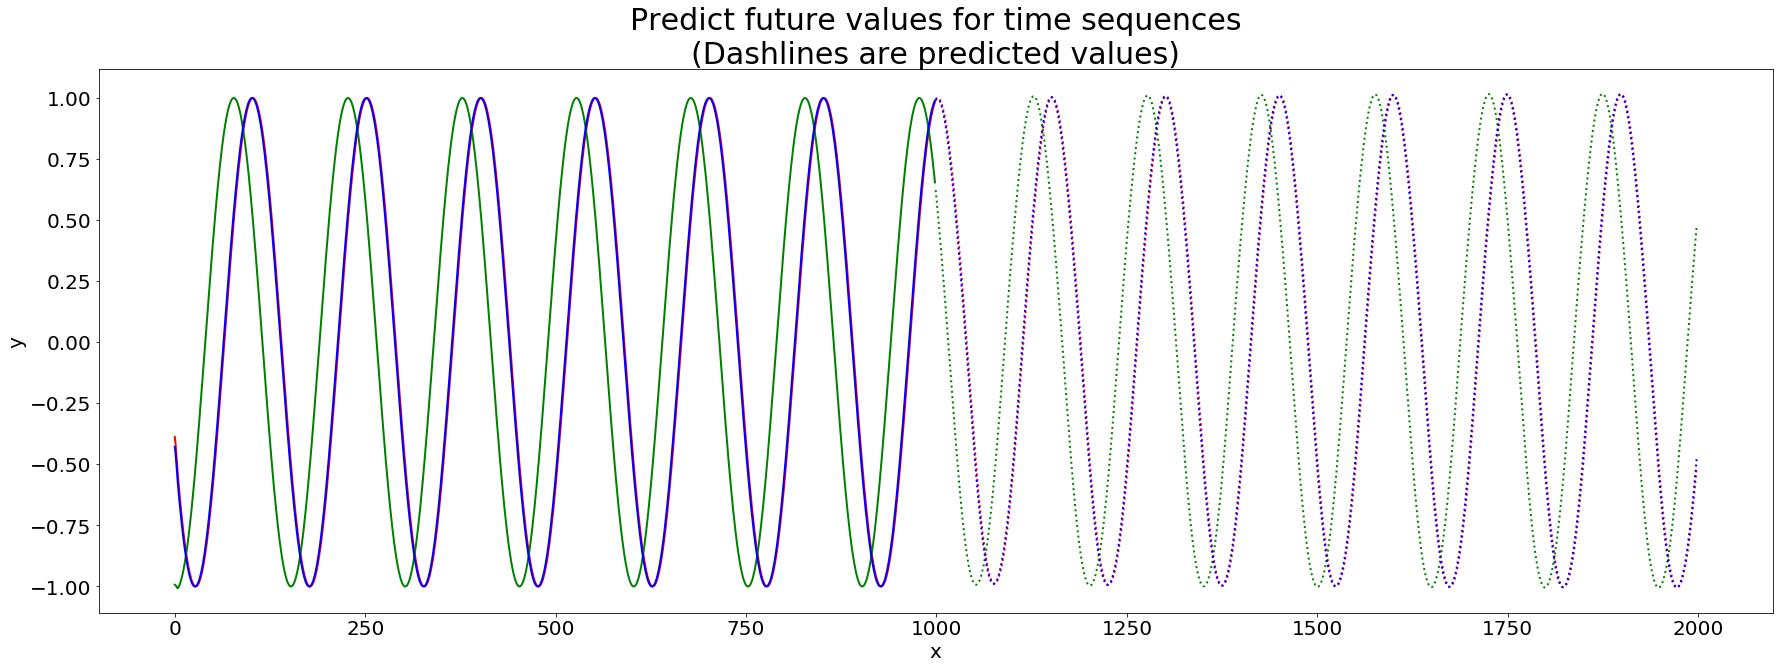

In [6]:
for i in range(15):
    print('STEP: ', i)
    def closure():
        optimizer.zero_grad()
        out = seq(input)
        loss = criterion(out, target)
        print('loss:', loss.data.numpy()[0])
        loss.backward()
        return loss
    optimizer.step(closure)

    # begin to predict
    future = 1000
    pred = seq(test_input, future = future)
    loss = criterion(pred[:, :-future], test_target)
    print('test loss:', loss.data.numpy()[0])
    y = pred.data.numpy()
    # draw the result
    plt.figure(figsize=(30,10))
    plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    def draw(yi, color):
        plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
        plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth = 2.0)
    draw(y[0], 'r')
    draw(y[1], 'g')
    draw(y[2], 'b')
    plt.show()